In [58]:
import pandas as pd 
import numpy as np 

In [59]:
# Import breast cancer dataset
data = pd.read_csv('..\data\METABRIC_RNA_Mutation.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'METABRIC_RNA_Mutation.csv'

In [8]:
data.shape

(1904, 693)

<Axes: title={'center': 'Age at Diagnosis'}, ylabel='Frequency'>

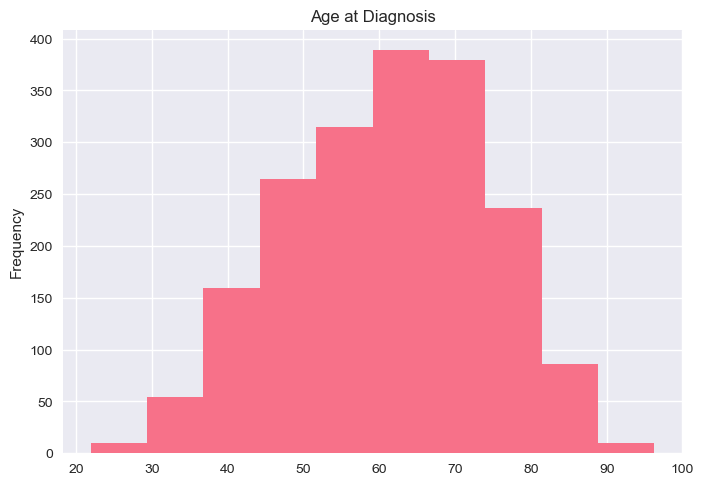

In [12]:
# Clinical Indicators EDA
data['age_at_diagnosis'].plot(kind='hist',title='Age at Diagnosis')

<Axes: title={'center': 'Tumor Size'}, ylabel='Frequency'>

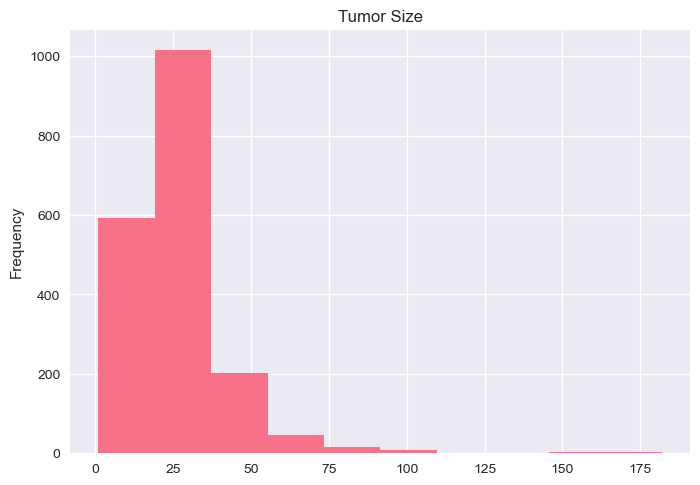

In [13]:
data['tumor_size'].plot(kind='hist',title='Tumor Size')

<Axes: title={'center': 'Lymph Node Involvment'}, ylabel='Frequency'>

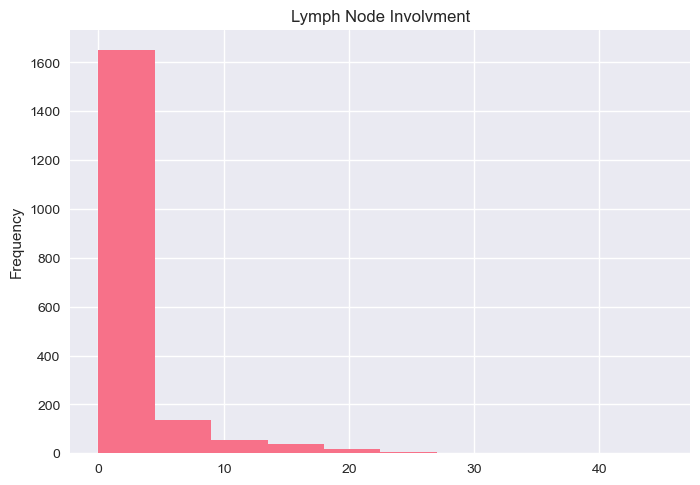

In [14]:
data['lymph_nodes_examined_positive'].plot(kind='hist',title='Lymph Node Involvment')

<Axes: title={'center': 'Number of Relevant Gene Mutations'}, ylabel='Frequency'>

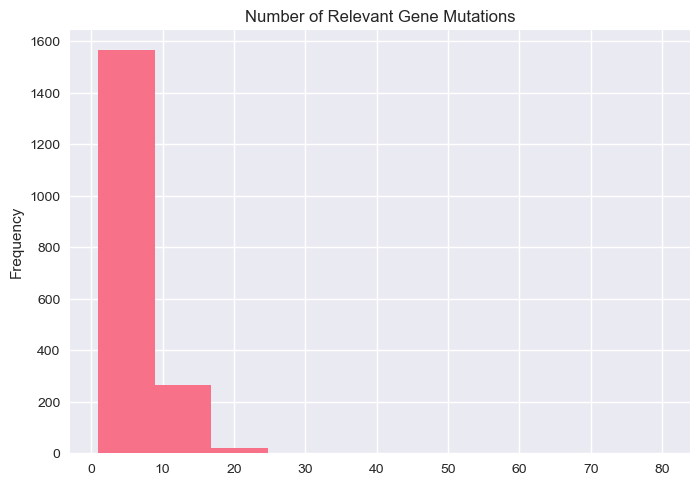

In [15]:
data['mutation_count'].plot(kind='hist',title='Number of Relevant Gene Mutations')

In [16]:
data[['age_at_diagnosis','tumor_size','lymph_nodes_examined_positive','mutation_count']].describe()

,age_at_diagnosis,tumor_size,lymph_nodes_examined_positive,mutation_count
count,1904.000000,1884.000000,1904.000000,1859.000000
mean,61.087054,26.238726,2.002101,5.697687
std,12.978711,15.160976,4.079993,4.058778
min,21.930000,1.000000,0.000000,1.000000
25%,51.375000,17.000000,0.000000,3.000000
50%,61.770000,23.000000,0.000000,5.000000
75%,70.592500,30.000000,2.000000,7.000000
max,96.290000,182.000000,45.000000,80.000000


<Axes: title={'center': 'Chemotherapy 1=Yes/0=No'}, ylabel='chemotherapy'>

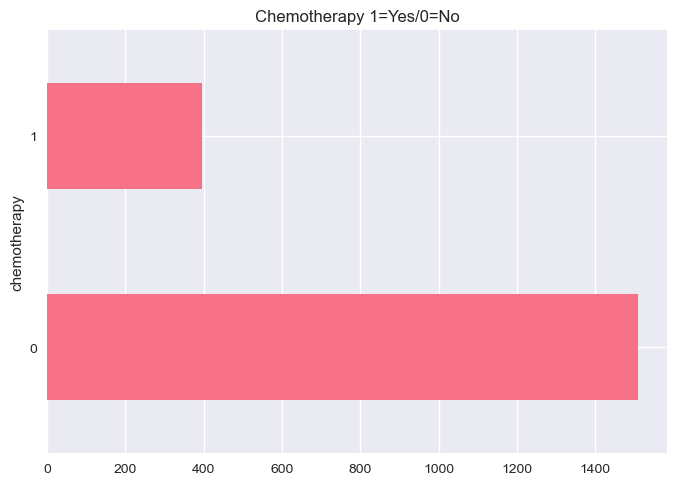

In [22]:
data['chemotherapy'].value_counts().plot(kind='barh',title='Chemotherapy 1=Yes/0=No')

<Axes: title={'center': 'Hormonal Treatment 1=Yes/0=No'}, ylabel='hormone_therapy'>

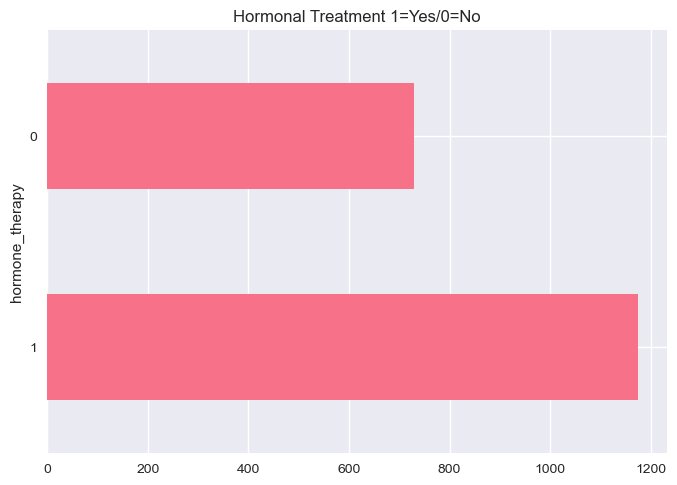

In [23]:
data['hormone_therapy'].value_counts().plot(kind='barh',title='Hormonal Treatment 1=Yes/0=No')

<Axes: title={'center': 'Type of Breast Surgery'}, ylabel='type_of_breast_surgery'>

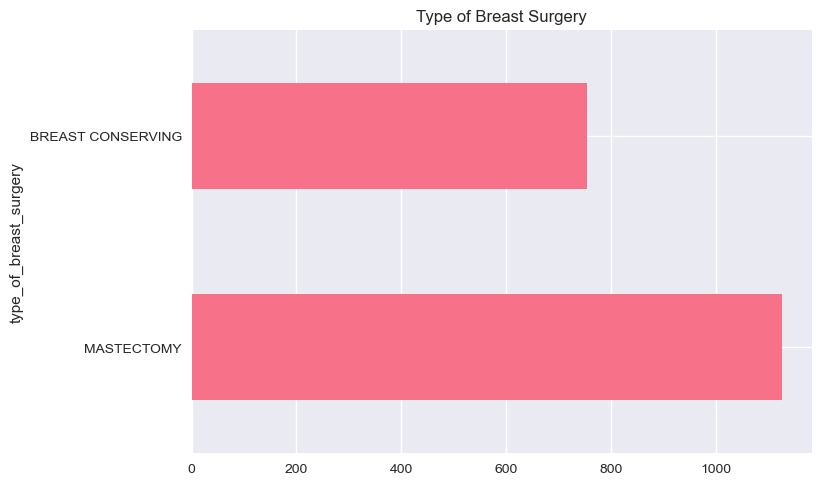

In [24]:
data['type_of_breast_surgery'].value_counts().plot(kind='barh',title='Type of Breast Surgery')

In [41]:
data['type_of_breast_surgery'].describe()

count           1882
unique             2
top       MASTECTOMY
freq            1127
Name: type_of_breast_surgery, dtype: object

In [32]:
mrna_score_columns = [x for x in data.columns[31:] if '_mut' not in x]
len(mrna_score_columns)

489

<Axes: title={'center': 'Median mRNA Z-Scores'}, ylabel='Frequency'>

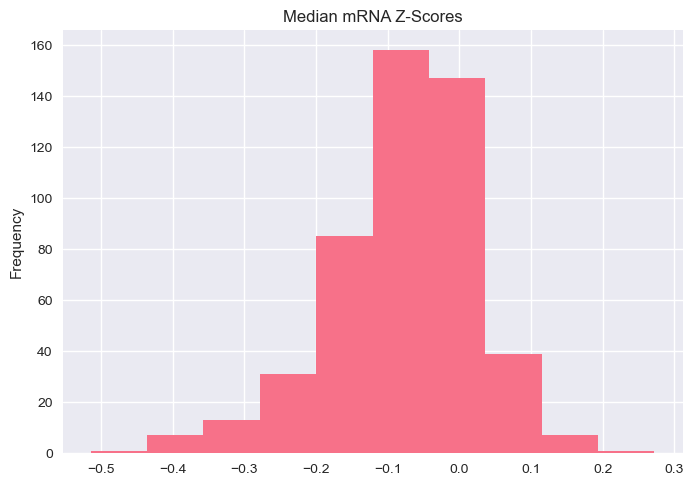

In [39]:
mrna_medians = data[mrna_score_columns].describe().loc['50%']
mrna_medians.plot(kind='hist',title='Median mRNA Z-Scores')

<Axes: title={'center': 'Mean mRNA Z-Scores'}, ylabel='Frequency'>

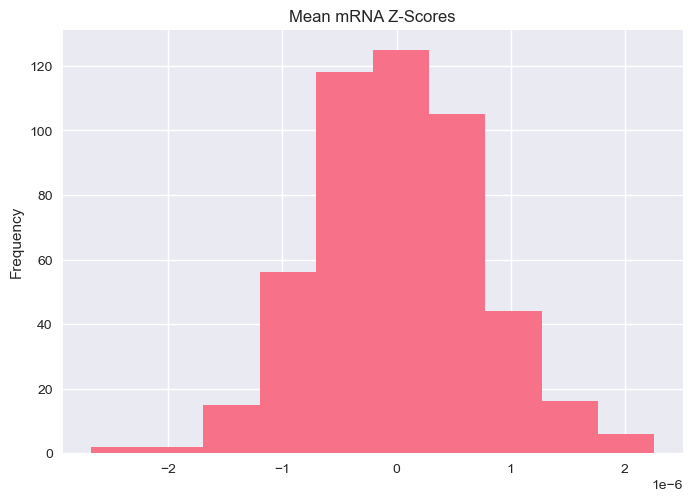

In [40]:
mrna_means = data[mrna_score_columns].describe().loc['mean']
mrna_means.plot(kind='hist',title='Mean mRNA Z-Scores')

In [42]:
mrna_medians.describe()

count    489.000000
mean      -0.074334
std        0.101597
min       -0.514150
25%       -0.126900
50%       -0.058200
75%       -0.010050
max        0.272200
Name: 50%, dtype: float64

In [43]:
mrna_means.describe()

count    4.890000e+02
mean    -4.188792e-09
std      7.362847e-07
min     -2.678571e-06
25%     -4.726891e-07
50%     -5.252101e-08
75%      5.252101e-07
max      2.258403e-06
Name: mean, dtype: float64

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

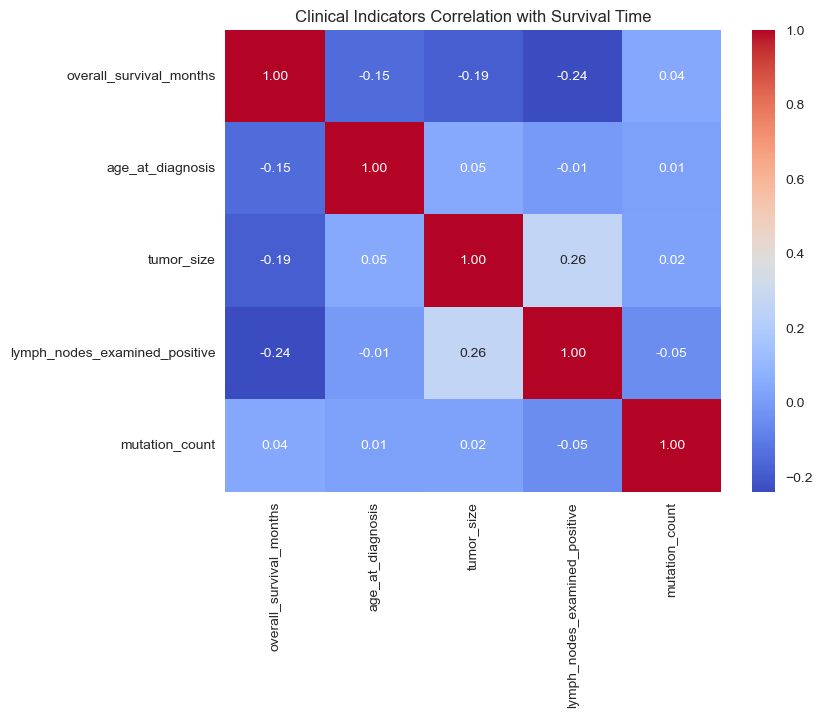

In [47]:
clin_corr = data[['overall_survival_months','age_at_diagnosis','tumor_size','lymph_nodes_examined_positive','mutation_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(clin_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Clinical Indicators Correlation with Survival Time')
plt.show()

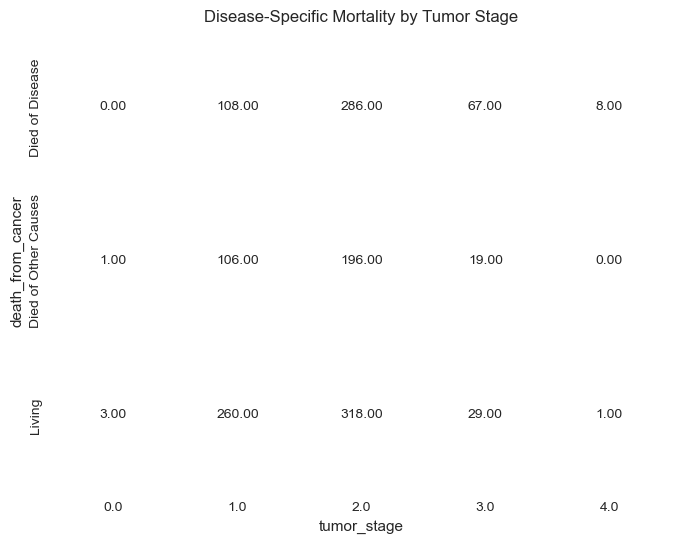

In [57]:
# Survival Snapshot
# data['death_from_cancer'].value_counts()
death_stage = pd.crosstab(data['death_from_cancer'],data['tumor_stage'])
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(death_stage, annot=True, cmap=['white'], fmt=".2f", cbar=False)
plt.title('Disease-Specific Mortality by Tumor Stage')
plt.show()

In [ ]:
# Survival Snapshot
# data['death_from_cancer'].value_counts()
pd.crosstab(data['death_from_cancer'],data['tumor_stage'])

tumor_stage,0.0,1.0,2.0,3.0,4.0
death_from_cancer,,,,,
Died of Disease,0,108,286,67,8
Died of Other Causes,1,106,196,19,0
Living,3,260,318,29,1


<Axes: ylabel='Frequency'>

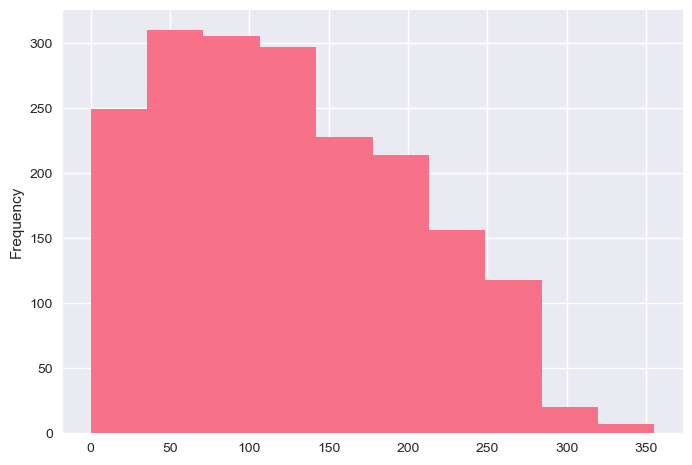

In [56]:
data['overall_survival_months'].plot(kind='hist')

In [ ]:
# Survival Snapshot
# data['death_from_cancer'].value_counts()
pd.crosstab(data['death_from_cancer'],data['tumor_stage'])

tumor_stage,0.0,1.0,2.0,3.0,4.0
death_from_cancer,,,,,
Died of Disease,0,108,286,67,8
Died of Other Causes,1,106,196,19,0
Living,3,260,318,29,1


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# from pathlib import Path

# # Set style for better-looking plots
# plt.style.use('seaborn-v0_8')
# sns.set_palette("husl")

# class MetabricEDA:
#     def __init__(self, csv_path):
#         """
#         Initialize the EDA class with the METABRIC dataset
        
#         Parameters:
#         csv_path (str): Path to the METABRIC CSV file
#         """
#         self.data = pd.read_csv(csv_path)
#         print(f"Dataset loaded successfully!")
#         print(f"Shape: {self.data.shape}")
#         print(f"Columns: {list(self.data.columns)}")
        
#     def find_column(self, possible_names):
#         """
#         Find column names that match possible variations (case-insensitive)
        
#         Parameters:
#         possible_names (list): List of possible column names to search for
        
#         Returns:
#         str: First matching column name found, or None
#         """
#         columns = self.data.columns.str.lower()
#         for name in possible_names:
#             matches = columns[columns.str.contains(name.lower(), na=False)]
#             if len(matches) > 0:
#                 # Return the original column name (not lowercase)
#                 return self.data.columns[columns.str.contains(name.lower(), na=False)].iloc[0]
#         return None
    
#     def plot_age_histogram(self):
#         """Create histogram for age distribution"""
#         age_col = self.find_column(['age', 'age_at_diagnosis', 'patient_age','age_at_diagnosis'])
        
#         if age_col is None:
#             print("Age column not found")
#             return
            
#         plt.figure(figsize=(10, 6))
#         age_data = self.data[age_col].dropna()
        
#         plt.hist(age_data, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
#         plt.title('Age Distribution of Patients', fontsize=16, fontweight='bold')
#         plt.xlabel('Age (years)', fontsize=12)
#         plt.ylabel('Frequency', fontsize=12)
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add statistics
#         mean_age = age_data.mean()
#         median_age = age_data.median()
#         plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
#         plt.axvline(median_age, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f}')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Age Statistics:")
#         print(f"  Mean: {mean_age:.1f} years")
#         print(f"  Median: {median_age:.1f} years")
#         print(f"  Range: {age_data.min():.1f} - {age_data.max():.1f} years")
#         print(f"  Valid records: {len(age_data)}/{len(self.data)}")
    
#     def plot_tumor_size_histogram(self):
#         """Create histogram for tumor size distribution"""
#         size_col = self.find_column(['tumor_size', 'tumour_size', 'size', 'tumor_size_mm'])
        
#         if size_col is None:
#             print("Tumor size column not found")
#             return
            
#         plt.figure(figsize=(10, 6))
#         size_data = self.data[size_col].dropna()
        
#         plt.hist(size_data, bins=12, edgecolor='black', alpha=0.7, color='lightgreen')
#         plt.title('Tumor Size Distribution', fontsize=16, fontweight='bold')
#         plt.xlabel('Tumor Size', fontsize=12)
#         plt.ylabel('Frequency', fontsize=12)
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add statistics
#         mean_size = size_data.mean()
#         median_size = size_data.median()
#         plt.axvline(mean_size, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_size:.1f}')
#         plt.axvline(median_size, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_size:.1f}')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Tumor Size Statistics:")
#         print(f"  Mean: {mean_size:.1f}")
#         print(f"  Median: {median_size:.1f}")
#         print(f"  Range: {size_data.min():.1f} - {size_data.max():.1f}")
#         print(f"  Valid records: {len(size_data)}/{len(self.data)}")
    
#     def plot_lymph_node_histogram(self):
#         """Create histogram for lymph node involvement"""
#         lymph_col = self.find_column(['lymph_nodes', 'lymph_node', 'nodes_examined', 'lymph_nodes_examined'])
        
#         if lymph_col is None:
#             print("Lymph node column not found")
#             return
            
#         plt.figure(figsize=(10, 6))
#         lymph_data = self.data[lymph_col].dropna()
        
#         plt.hist(lymph_data, bins=15, edgecolor='black', alpha=0.7, color='coral')
#         plt.title('Lymph Node Involvement Distribution', fontsize=16, fontweight='bold')
#         plt.xlabel('Number of Lymph Nodes', fontsize=12)
#         plt.ylabel('Frequency', fontsize=12)
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add statistics
#         mean_lymph = lymph_data.mean()
#         median_lymph = lymph_data.median()
#         plt.axvline(mean_lymph, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_lymph:.1f}')
#         plt.axvline(median_lymph, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_lymph:.1f}')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Lymph Node Statistics:")
#         print(f"  Mean: {mean_lymph:.1f}")
#         print(f"  Median: {median_lymph:.1f}")
#         print(f"  Range: {lymph_data.min():.1f} - {lymph_data.max():.1f}")
#         print(f"  Valid records: {len(lymph_data)}/{len(self.data)}")
    
#     def plot_treatment_analysis(self):
#         """Create bar chart for treatment modalities"""
#         treatments = {
#             'Chemotherapy': ['chemotherapy', 'chemo', 'ct'],
#             'Hormone Therapy': ['hormone_therapy', 'hormonal_therapy', 'ht', 'hormone'],
#             'Radio Therapy': ['radio_therapy', 'radiotherapy', 'rt', 'radiation'],
#             'Surgery': ['surgery_performed', 'surgery', 'surgical', 'operation']
#         }
        
#         treatment_summary = {}
        
#         for treatment_name, possible_cols in treatments.items():
#             col = self.find_column(possible_cols)
#             if col is not None:
#                 # Handle different encoding formats
#                 values = self.data[col].copy()
                
#                 # Convert to standardized format
#                 yes_count = 0
#                 no_count = 0
#                 unknown_count = 0
                
#                 for val in values:
#                     if pd.isna(val):
#                         unknown_count += 1
#                     elif val in [1, 'YES', 'Yes', 'yes', True, '1']:
#                         yes_count += 1
#                     elif val in [0, 'NO', 'No', 'no', False, '0']:
#                         no_count += 1
#                     else:
#                         unknown_count += 1
                
#                 treatment_summary[treatment_name] = {
#                     'Yes': yes_count,
#                     'No': no_count,
#                     'Unknown': unknown_count
#                 }
#             else:
#                 print(f"Column for {treatment_name} not found")
        
#         if not treatment_summary:
#             print("No treatment columns found")
#             return
        
#         # Create stacked bar chart
#         fig, ax = plt.subplots(figsize=(12, 8))
        
#         treatments = list(treatment_summary.keys())
#         yes_counts = [treatment_summary[t]['Yes'] for t in treatments]
#         no_counts = [treatment_summary[t]['No'] for t in treatments]
#         unknown_counts = [treatment_summary[t]['Unknown'] for t in treatments]
        
#         x = np.arange(len(treatments))
#         width = 0.6
        
#         p1 = ax.bar(x, yes_counts, width, label='Yes', color='lightgreen')
#         p2 = ax.bar(x, no_counts, width, bottom=yes_counts, label='No', color='lightcoral')
#         p3 = ax.bar(x, unknown_counts, width, 
#                    bottom=np.array(yes_counts) + np.array(no_counts), 
#                    label='Unknown', color='lightgray')
        
#         ax.set_title('Treatment Modalities Distribution', fontsize=16, fontweight='bold')
#         ax.set_xlabel('Treatment Type', fontsize=12)
#         ax.set_ylabel('Number of Patients', fontsize=12)
#         ax.set_xticks(x)
#         ax.set_xticklabels(treatments, rotation=45, ha='right')
#         ax.legend()
#         ax.grid(axis='y', alpha=0.3)
        
#         # Add percentage labels
#         for i, treatment in enumerate(treatments):
#             total = sum(treatment_summary[treatment].values())
#             yes_pct = (yes_counts[i] / total) * 100
#             ax.text(i, yes_counts[i]/2, f'{yes_pct:.1f}%', 
#                    ha='center', va='center', fontweight='bold')
        
#         plt.tight_layout()
#         plt.show()
        
#         # Print summary
#         print("Treatment Summary:")
#         for treatment, counts in treatment_summary.items():
#             total = sum(counts.values())
#             yes_pct = (counts['Yes'] / total) * 100
#             print(f"  {treatment}: {counts['Yes']}/{total} ({yes_pct:.1f}%) received treatment")
    
#     def plot_mutation_histogram(self):
#         """Create histogram for gene mutations"""
#         mutation_col = self.find_column(['mutation', 'mutations', 'gene_mutation', 'mutation_count'])
        
#         if mutation_col is None:
#             print("Gene mutation column not found")
#             return
            
#         plt.figure(figsize=(10, 6))
#         mutation_data = self.data[mutation_col].dropna()
        
#         plt.hist(mutation_data, bins=10, edgecolor='black', alpha=0.7, color='gold')
#         plt.title('Gene Mutation Distribution', fontsize=16, fontweight='bold')
#         plt.xlabel('Number of Mutations', fontsize=12)
#         plt.ylabel('Frequency', fontsize=12)
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add statistics
#         mean_mut = mutation_data.mean()
#         median_mut = mutation_data.median()
#         plt.axvline(mean_mut, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_mut:.1f}')
#         plt.axvline(median_mut, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_mut:.1f}')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Gene Mutation Statistics:")
#         print(f"  Mean: {mean_mut:.1f}")
#         print(f"  Median: {median_mut:.1f}")
#         print(f"  Range: {mutation_data.min():.1f} - {mutation_data.max():.1f}")
#         print(f"  Valid records: {len(mutation_data)}/{len(self.data)}")
    
#     def plot_cancer_type_distribution(self):
#         """Create bar chart for detailed cancer types"""
#         cancer_col = self.find_column(['cancer_type', 'type_of_breast_surgery', 'histological_type', 'type'])
        
#         if cancer_col is None:
#             print("Cancer type column not found")
#             return
            
#         plt.figure(figsize=(14, 8))
        
#         # Get value counts and show top 15
#         cancer_counts = self.data[cancer_col].value_counts().head(15)
        
#         bars = plt.bar(range(len(cancer_counts)), cancer_counts.values, 
#                       color='lightsteelblue', edgecolor='black', alpha=0.7)
        
#         plt.title('Cancer Type Distribution (Top 15)', fontsize=16, fontweight='bold')
#         plt.xlabel('Cancer Type', fontsize=12)
#         plt.ylabel('Number of Cases', fontsize=12)
#         plt.xticks(range(len(cancer_counts)), cancer_counts.index, rotation=45, ha='right')
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add value labels on bars
#         for bar, value in zip(bars, cancer_counts.values):
#             plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
#                     str(value), ha='center', va='bottom', fontweight='bold')
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Cancer Type Statistics:")
#         print(f"  Total unique types: {self.data[cancer_col].nunique()}")
#         print(f"  Most common: {cancer_counts.index[0]} ({cancer_counts.iloc[0]} cases)")
#         print(f"  Valid records: {self.data[cancer_col].notna().sum()}/{len(self.data)}")
    
#     def plot_tumor_stage_distribution(self):
#         """Create bar chart for tumor stage distribution"""
#         stage_col = self.find_column(['stage', 'tumor_stage', 'tumour_stage', 'neoplasm_histologic_grade'])
        
#         if stage_col is None:
#             print("Tumor stage column not found")
#             return
            
#         plt.figure(figsize=(10, 6))
        
#         # Get value counts
#         stage_counts = self.data[stage_col].value_counts().sort_index()
        
#         bars = plt.bar(range(len(stage_counts)), stage_counts.values, 
#                       color='mediumpurple', edgecolor='black', alpha=0.7)
        
#         plt.title('Tumor Stage Distribution', fontsize=16, fontweight='bold')
#         plt.xlabel('Tumor Stage', fontsize=12)
#         plt.ylabel('Number of Cases', fontsize=12)
#         plt.xticks(range(len(stage_counts)), stage_counts.index)
#         plt.grid(axis='y', alpha=0.3)
        
#         # Add value labels on bars
#         for bar, value in zip(bars, stage_counts.values):
#             plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
#                     str(value), ha='center', va='bottom', fontweight='bold')
        
#         plt.tight_layout()
#         plt.show()
        
#         print(f"Tumor Stage Statistics:")
#         print(f"  Total stages: {len(stage_counts)}")
#         print(f"  Most common: {stage_counts.index[0]} ({stage_counts.iloc[0]} cases)")
#         print(f"  Valid records: {self.data[stage_col].notna().sum()}/{len(self.data)}")
    
#     def generate_summary_report(self):
#         """Generate a comprehensive summary report"""
#         print("\n" + "="*60)
#         print("METABRIC DATASET - COMPREHENSIVE SUMMARY REPORT")
#         print("="*60)
        
#         print(f"\nDATASET OVERVIEW:")
#         print(f"  Total Patients: {len(self.data):,}")
#         print(f"  Total Variables: {len(self.data.columns)}")
#         print(f"  Memory Usage: {self.data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
#         print(f"\nMISSING DATA SUMMARY:")
#         missing_summary = self.data.isnull().sum().sort_values(ascending=False)
#         missing_pct = (missing_summary / len(self.data)) * 100
        
#         print("  Top 10 variables with missing data:")
#         for col, missing in missing_summary.head(10).items():
#             if missing > 0:
#                 print(f"    {col}: {missing:,} ({missing_pct[col]:.1f}%)")
        
#         print(f"\nNUMERIC VARIABLES SUMMARY:")
#         numeric_cols = self.data.select_dtypes(include=[np.number]).columns
#         print(f"  Number of numeric variables: {len(numeric_cols)}")
        
#         print(f"\nCATEGORICAL VARIABLES SUMMARY:")
#         categorical_cols = self.data.select_dtypes(include=['object']).columns
#         print(f"  Number of categorical variables: {len(categorical_cols)}")
        
#         print("\n" + "="*60)
    
#     def run_complete_eda(self):
#         """Run all EDA analyses"""
#         print("Starting METABRIC Dataset Exploratory Data Analysis...")
#         print("-" * 50)
        
#         # Generate summary report
#         self.generate_summary_report()
        
#         # Run all visualizations
#         print("\nGenerating visualizations...")
        
#         self.plot_age_histogram()
#         self.plot_tumor_size_histogram()
#         self.plot_lymph_node_histogram()
#         self.plot_treatment_analysis()
#         self.plot_mutation_histogram()
#         self.plot_cancer_type_distribution()
#         self.plot_tumor_stage_distribution()
        
#         print("\nEDA Analysis Complete!")


# # Example usage
# if __name__ == "__main__":
#     # Replace with your actual file path
#     csv_file_path = "METABRIC_RNA_Mutation.csv"
    
#     # Check if file exists
#     if not Path(csv_file_path).exists():
#         print(f"File {csv_file_path} not found!")
#         print("Please update the csv_file_path variable with the correct path to your METABRIC dataset.")
#     else:
#         # Initialize and run EDA
#         eda = MetabricEDA(csv_file_path)
#         eda.run_complete_eda()
        
#         # You can also run individual analyses:
#         # eda.plot_age_histogram()
#         # eda.plot_treatment_analysis()
#         # etc.

/var/folders/nx/9zdhfhm57x339x_66wch7hdw0000gn/T/ipykernel_50162/4001965033.py:19: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(csv_path)


Dataset loaded successfully!
Shape: (1904, 693)
Columns: ['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cd

AttributeError: 'Index' object has no attribute 'iloc'